
### Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier


### Load the Data

In [2]:
customers_file_path = r'C:\Users\User\Desktop\Delivergate Pvt Ltd\customers.csv'
orders_file_path = r'C:\Users\User\Desktop\Delivergate Pvt Ltd\order.csv'

#### Read the CSV files

In [3]:
customers_df = pd.read_csv(customers_file_path)
orders_df = pd.read_csv(orders_file_path)

### Inspect the  the datasets

In [4]:
#First few rows of orders_df
orders_df.head()

,id,display_order_id,total_amount,created_at,customer_id
0,13392,YTFA,425,2024-10-14 15:12:43,1251.0
1,13393,N1U7,1650,2024-10-14 15:17:25,1251.0
2,13394,PADV,1365,2024-10-14 17:02:16,468.0
3,13395,OKVW,525,2024-10-14 17:03:36,1251.0
4,13396,2G3Q,525,2024-10-14 17:04:49,468.0


In [5]:
# Shape of the dataset (rows, columns)
print("\nShape of the orders_df (rows, columns):")
print(orders_df.shape)

# Data types of each column
print("\nData types of each column in orders_df:")
print(orders_df.dtypes)

# Statistical description of the dataset
print("\nStatistical description of orders_df:")
print(orders_df.describe())


Shape of the orders_df (rows, columns):
(8117, 5)

Data types of each column in orders_df:
id                    int64
display_order_id     object
total_amount          int64
created_at           object
customer_id         float64
dtype: object

Statistical description of orders_df:
                 id   total_amount    customer_id
count   8117.000000    8117.000000    7992.000000
mean    7070.489590    3814.427498     835.586211
std     4197.979807   13972.090460    6683.544930
min       13.000000   -3855.000000       8.000000
25%     3299.000000    1175.000000      91.000000
50%     7779.000000    2448.000000     203.000000
75%    10882.000000    3930.000000     582.000000
max    13522.000000  510000.000000  100012.000000


In [6]:
customers_df.head()

,customer_id,name,email
0,8,customer three,customer3@gmail.com
1,9,Shafran Naizer,mshafran13@gmail.com
2,10,Isuri Liyanage,liyanage.isukavi@gmail.com
3,12,Shafran Naizer,shafran@ieee.org
4,13,sss ss,ss@ieee.org


In [7]:
# Shape of the dataset (rows, columns)
print("\nShape of the orders_df (rows, columns):")
print(customers_df.shape)

# Data types of each column
print("\nData types of each column in customers_df:")
print(customers_df.dtypes)

# Statistical description of the dataset
print("\nStatistical description of customers_df:")
print(customers_df.describe())


Shape of the orders_df (rows, columns):
(1114, 3)

Data types of each column in customers_df:
customer_id     int64
name           object
email          object
dtype: object

Statistical description of customers_df:
       customer_id
count  1114.000000
mean    672.044883
std     353.520807
min       8.000000
25%     379.250000
50%     687.500000
75%     969.750000
max    1274.000000


# Data Preprocessing

###  Checking Missing Values

In [8]:
print(customers_df.isnull().sum())

customer_id     0
name            6
email          18
dtype: int64


In [9]:
print(orders_df.isnull().sum())

id                    0
display_order_id     36
total_amount          0
created_at            0
customer_id         125
dtype: int64


### Handling Missing Values

In [10]:
# For customers_df: Fill missing 'name' with 'Unknown', drop rows with missing 'email'
customers_df['name'] = customers_df['name'].fillna('Unknown')
customers_df = customers_df.dropna(subset=['email'])

# For orders_df: Drop rows with missing 'customer_id', fill missing 'display_order_id' with 0
orders_df = orders_df.dropna(subset=['customer_id'])
orders_df['display_order_id'] = orders_df['display_order_id'].fillna(0)

# Verify that missing values are handled
print("\nAfter handling missing values in customers_df:")
print(customers_df.isnull().sum())

print("\nAfter handling missing values in orders_df:")
print(orders_df.isnull().sum())



After handling missing values in customers_df:
customer_id    0
name           0
email          0
dtype: int64

After handling missing values in orders_df:
id                  0
display_order_id    0
total_amount        0
created_at          0
customer_id         0
dtype: int64


In [11]:
# Checking and converting 'customer_id' to int to ensure consistent data types
customers_df['customer_id'] = customers_df['customer_id'].astype(int)
orders_df['customer_id'] = orders_df['customer_id'].astype(int)

### Feature Engineering

In [12]:
# Create a feature for total orders per customer
order_counts = orders_df.groupby('customer_id')['id'].count().reset_index()
order_counts.columns = ['customer_id', 'total_orders']

# Create a feature for total revenue per customer
total_revenue = orders_df.groupby('customer_id')['total_amount'].sum().reset_index()
total_revenue.columns = ['customer_id', 'total_revenue']

# Merge these features into the customers dataframe
customers_df = customers_df.merge(order_counts, on='customer_id', how='left')
customers_df = customers_df.merge(total_revenue, on='customer_id', how='left')

# Fill missing values for customers without orders
customers_df['total_orders'] = customers_df['total_orders'].fillna(0)
customers_df['total_revenue'] = customers_df['total_revenue'].fillna(0)

# Verify the new features
print("\nCustomers DataFrame after feature engineering:")
print(customers_df.head())



Customers DataFrame after feature engineering:
   customer_id            name                       email  total_orders  \
0            8  customer three         customer3@gmail.com          11.0   
1            9  Shafran Naizer        mshafran13@gmail.com           2.0   
2           10  Isuri Liyanage  liyanage.isukavi@gmail.com          12.0   
3           12  Shafran Naizer            shafran@ieee.org           7.0   
4           13          sss ss                 ss@ieee.org           0.0   

   total_revenue  
0        27500.0  
1         6797.0  
2        31200.0  
3        17200.0  
4            0.0  


In [13]:
# Verify the new features:Customers DataFrame after feature engineering
customers_df.head()

,customer_id,name,email,total_orders,total_revenue
0,8,customer three,customer3@gmail.com,11.0,27500.0
1,9,Shafran Naizer,mshafran13@gmail.com,2.0,6797.0
2,10,Isuri Liyanage,liyanage.isukavi@gmail.com,12.0,31200.0
3,12,Shafran Naizer,shafran@ieee.org,7.0,17200.0
4,13,sss ss,ss@ieee.org,0.0,0.0


### Define Target Variable (Repeat Purchaser)

In [14]:
# Define the target variable 'repeat_purchaser' based on total orders
customers_df['repeat_purchaser'] = customers_df['total_orders'].apply(lambda x: 1 if x > 1 else 0)


### Select Features and Split Data

In [15]:
# Select features and target variable
X = customers_df[['total_orders', 'total_revenue']]
y = customers_df['repeat_purchaser']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train the Random Forest classifier Model

In [16]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Make Predictions

In [17]:
# Make predictions
y_pred = model.predict(X_test)


### Evaluate the Model


Model Accuracy: 100.00%


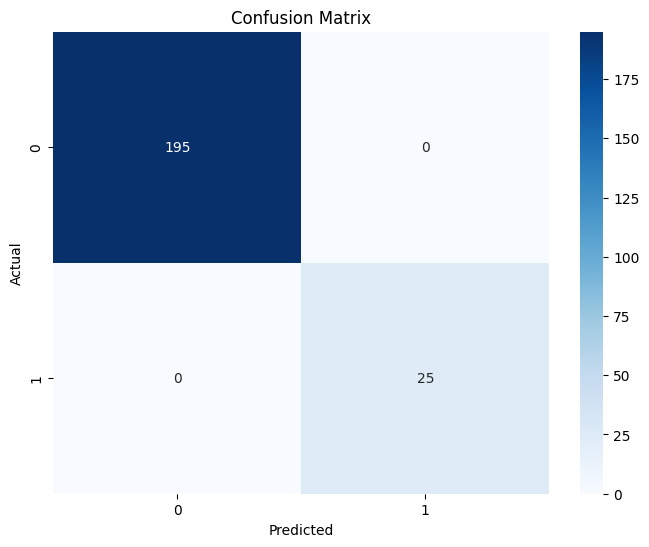


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00        25

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



In [18]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Evaluate precision, recall, f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

### Cross-Validation and Metric Evaluation

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 100.00%


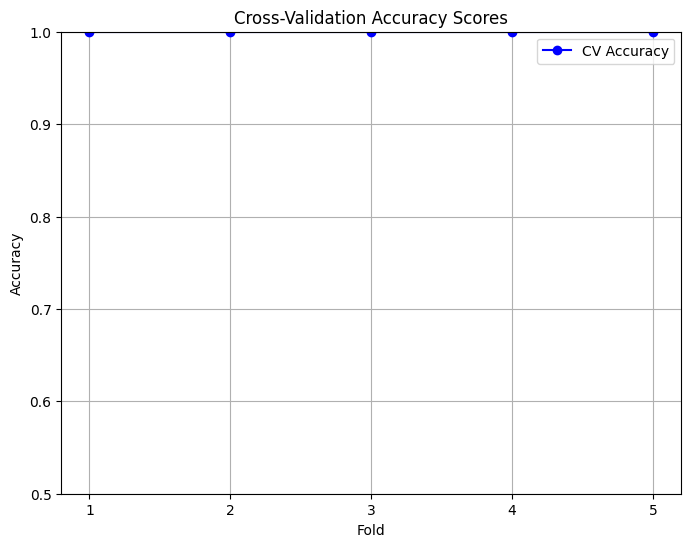


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00        25

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



In [19]:
# Cross-validation (using 5 folds)
cv_scores = cross_val_score(model, X, y, cv=5)

# Print Cross-validation scores
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean() * 100:.2f}%")

# Plot the cross-validation accuracy scores
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, 6), cv_scores, marker='o', linestyle='-', color='b', label="CV Accuracy")
plt.title('Cross-Validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])  # Set Y-axis limit for better visual comparison
plt.xticks(np.arange(1, 6))  # Set x-ticks for each fold
plt.grid(True)
plt.legend()
plt.show()

# Evaluate the model on the test set (as before)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
